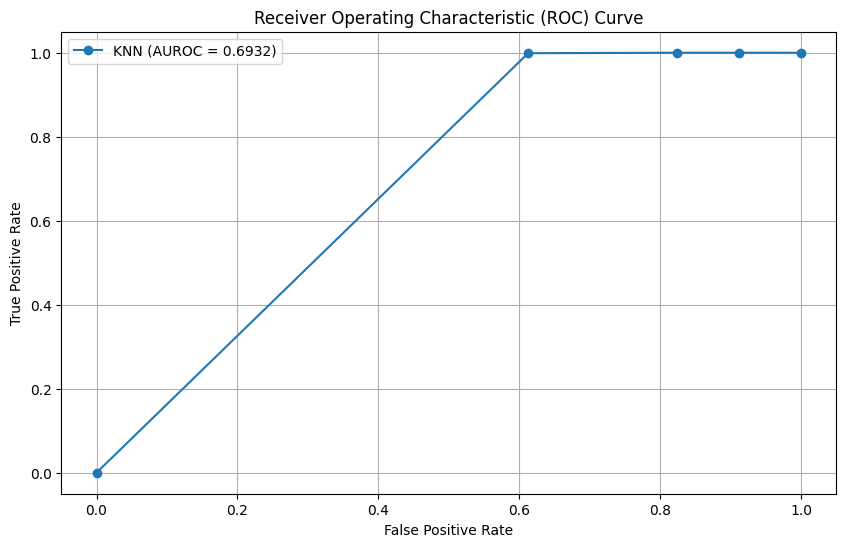

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score

def main():
    # Load the dataset from the Excel file
    df = pd.read_excel('/content/Book1.xlsx')

    # Strip leading/trailing spaces from column names
    df.columns = df.columns.str.strip()

    # Extract texts from ENGLISH and HINDI columns
    english_texts = df['ENGLISH'].tolist()
    hindi_texts = df['HINDI'].tolist()

    # Create labels for the texts (0 for English, 1 for Hindi)
    english_labels = [0] * len(english_texts)
    hindi_labels = [1] * len(hindi_texts)

    # Combine the texts and labels
    texts = english_texts + hindi_texts
    labels = english_labels + hindi_labels

    # Create a TF-IDF Vectorizer and fit_transform the text data
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(texts).toarray()

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, labels, test_size=0.3, random_state=42)

    # Train a K-Nearest Neighbors classifier with k=3
    k = 3
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)

    # Predict probabilities on the test set
    y_test_prob = neigh.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

    # Compute ROC curve and AUROC
    fpr, tpr, _ = roc_curve(y_test, y_test_prob)
    auc_score = roc_auc_score(y_test, y_test_prob)

    # Plot ROC Curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, marker='o', label=f'KNN (AUROC = {auc_score:.4f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()
